In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_SERVICE_FORCE_INTEL"] = "1"

import numpy as np
if not hasattr(np, "string_"): np.string_ = np.bytes_
if not hasattr(np, "unicode_"): np.unicode_ = np.str_

## EDA

In [2]:
import sys
sys.path.append("../src")

from config import Cfg
from dataset import MultiSensorAlertDataset
from eda import summarize_dataset, plot_pairing_hist, plot_valid_hist, quick_panel, band_stats_by_provider, plot_quality

cfg = Cfg.load("../config.yaml")
ds = MultiSensorAlertDataset(cfg)
print("Indexed records:", len(ds))

# good = [i for i in range(len(ds)) if ds[i]["quality"]["clean_percent"] >= 60.0]

c:\Users\Usuario\Desktop\projects\capacity\assignment\notebooks\../src\raster.py:12: UserWarning: no explicit representation of timezones available for np.datetime64
  return np.datetime64(dt)


Indexed records: 391


In [3]:
ds[0].keys()

dict_keys(['image', 'mask', 'valid', 'valid_union', 'valid_s2', 'valid_s1', 'channels', 'alert_id', 'dates', 'quality'])

In [4]:
summarize_dataset(ds)

Total records: 391
Unique alert_ids: 77
Records with both S2&S1: 217
Only S2: 174 | Only S1: 0
S2 providers: Counter({'BDC_S2_L2A': 244, 'BDC_S2-16D': 80, 'AWS': 67})
|Δ days| S1–S2: median=3.2, P90=6.3, max=47.39816190905093


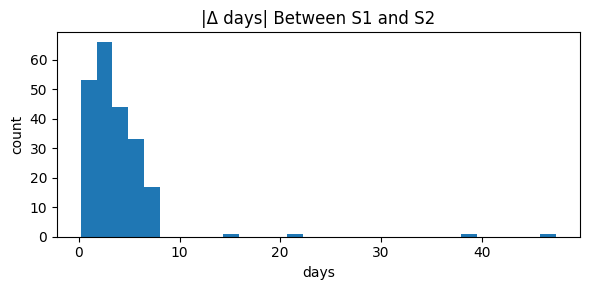

In [5]:
plot_pairing_hist(ds.records)

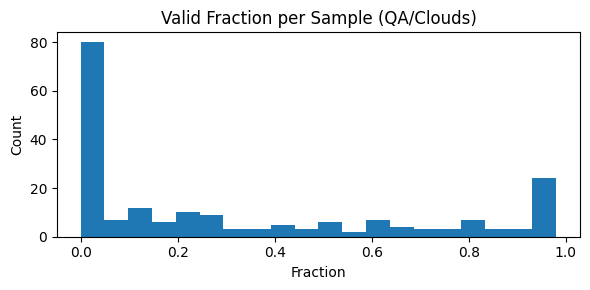

In [6]:
plot_valid_hist(ds, n=200)

In [ ]:
alerts_ids = []
temp = 1
for idx in range(len(ds)):
    alert_id = ds[idx]["alert_id"]
    clean_percent = ds[idx]["quality"]["clean_percent"]

    if alert_id not in alerts_ids:
        alerts_ids.append(alert_id)
        temp = 1
    else:
        alert_id += f"_{temp}"
        temp += 1
    quick_panel(ds[idx], output=f"../figs/{alert_id}_[{int(clean_percent)}].png")

Resumen por proveedor/banda (media +/- std, min–max):
  BDC_S2_L2A   S2_B04   μ=0.170 σ=0.200  [0.000,0.856]  skew=1.44  kurt=1.74
  BDC_S2_L2A   S2_B03   μ=0.169 σ=0.205  [0.000,0.879]  skew=1.53  kurt=1.97
  BDC_S2_L2A   S2_B02   μ=0.170 σ=0.215  [0.000,0.910]  skew=1.59  kurt=2.05
  BDC_S2_L2A   S2_B08   μ=0.245 σ=0.214  [0.000,0.878]  skew=0.49  kurt=-0.33
  BDC_S2_L2A   S1_VV    μ=22.085 σ=2.806  [6.342,24.337]  skew=-4.52  kurt=20.97
  BDC_S2_L2A   S1_VH    μ=19.286 σ=2.737  [3.967,21.275]  skew=-4.51  kurt=20.91
  BDC_S2-16D   S2_B04   μ=0.549 σ=0.379  [0.023,1.000]  skew=-0.07  kurt=-1.66
  BDC_S2-16D   S2_B03   μ=0.581 σ=0.374  [0.033,1.000]  skew=-0.06  kurt=-1.68
  BDC_S2-16D   S2_B02   μ=0.592 σ=0.379  [0.029,1.000]  skew=-0.13  kurt=-1.66
  BDC_S2-16D   S2_B08   μ=0.748 σ=0.220  [0.347,1.000]  skew=-0.07  kurt=-1.53
  BDC_S2-16D   S1_VV    μ=21.587 σ=4.072  [3.965,24.376]  skew=-3.38  kurt=10.44
  BDC_S2-16D   S1_VH    μ=18.787 σ=3.963  [1.703,21.462]  skew=-3.37  kurt=10.

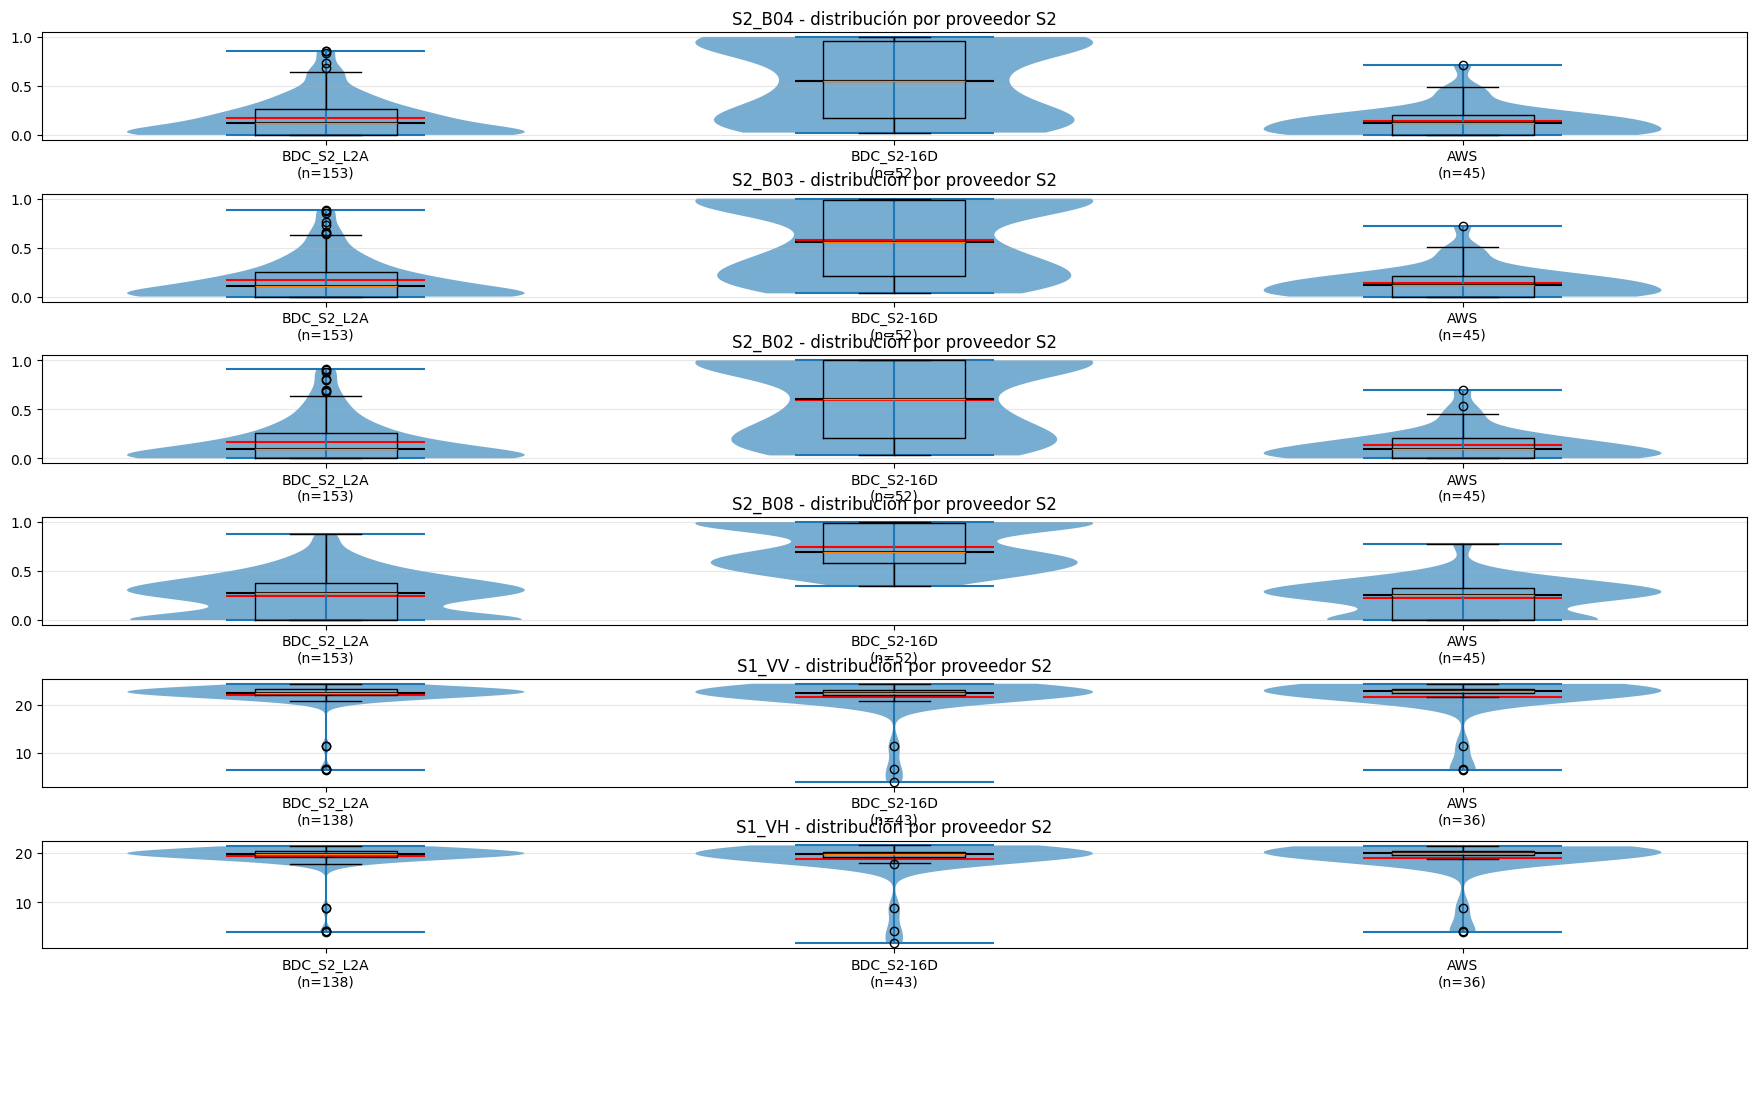

In [ ]:
band_stats_by_provider(ds, bands=("S2_B04","S2_B03","S2_B02","S2_B08", "S1_VV", "S1_VH"), n_samples=300)

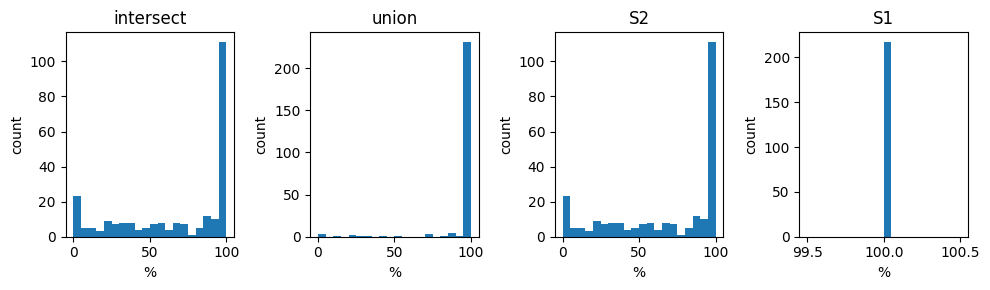

In [ ]:
plot_quality(ds)

## To train

In [ ]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["MKL_SERVICE_FORCE_INTEL"] = "1"

import numpy as np
if not hasattr(np, "string_"): np.string_ = np.bytes_
if not hasattr(np, "unicode_"): np.unicode_ = np.str_

In [ ]:
from pl_train import train

train("../config.yaml")